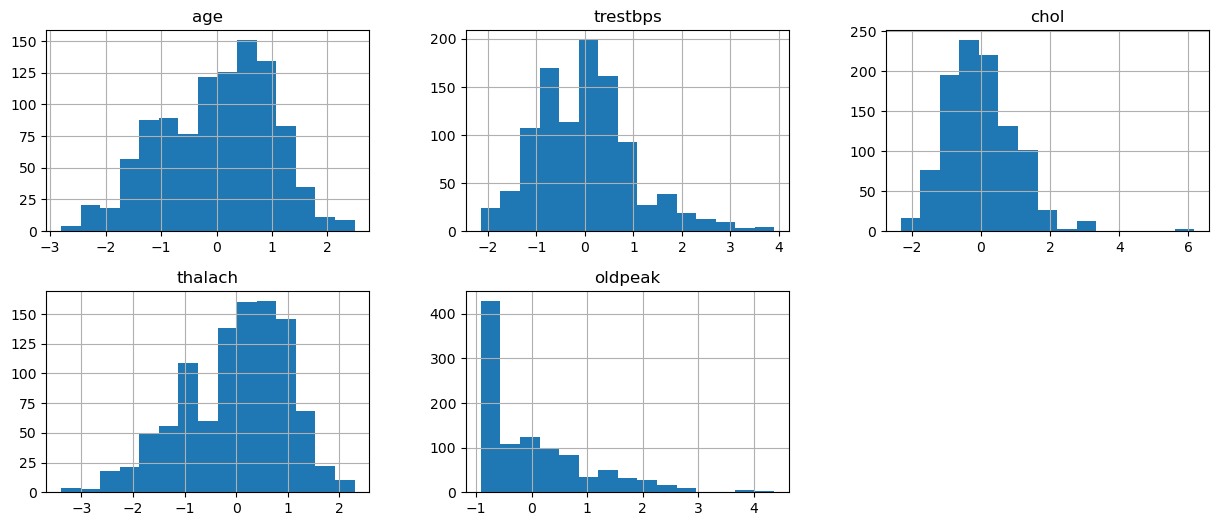

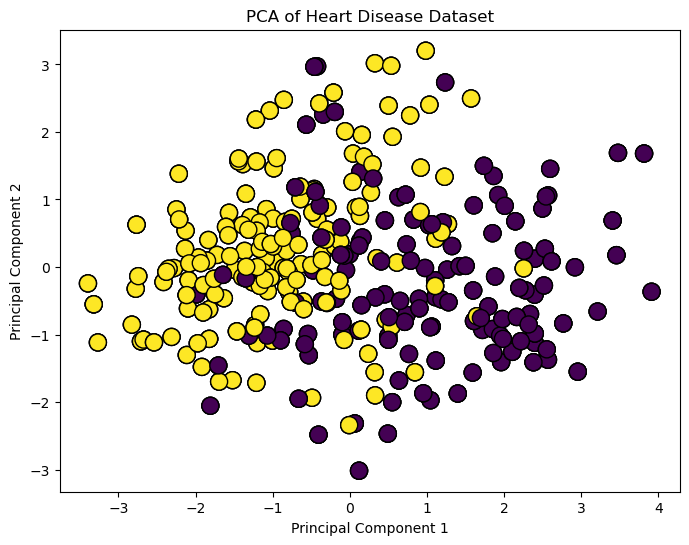

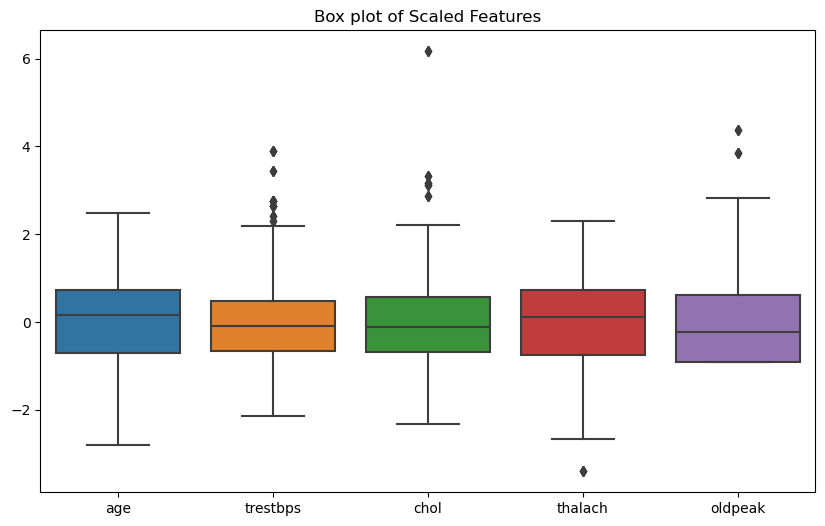

In [23]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, 
    classification_report, mean_absolute_error, mean_squared_error, roc_auc_score, 
    precision_recall_curve, matthews_corrcoef
)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'heart2.csv'
df = pd.read_csv(file_path)

# Data Cleaning
# Replace missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Convert numeric features to nominal
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
label_encoder = LabelEncoder()
for feature in categorical_features:
    df_imputed[feature] = label_encoder.fit_transform(df_imputed[feature])

# Normalization and Standardization
features_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = MinMaxScaler()
df_imputed[features_to_scale] = scaler.fit_transform(df_imputed[features_to_scale])

standard_scaler = StandardScaler()
df_imputed[features_to_scale] = standard_scaler.fit_transform(df_imputed[features_to_scale])

# Splitting the dataset into features and target
target_column = 'target'
X = df_imputed.drop(target_column, axis=1)
y = df_imputed[target_column]

# Principal Component Analysis (PCA)
n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Visualizations
# Histogram
df_imputed[features_to_scale].hist(bins=15, figsize=(15, 6), layout=(2, 3))
plt.show()

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=150)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Heart Disease Dataset')
plt.show()

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_imputed[features_to_scale])
plt.title('Box plot of Scaled Features')
plt.show()


In [27]:
# Split the data into training and testing sets (ensuring the correct size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the sizes
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# Train Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict using Logistic Regression model
y_pred_logreg = logreg.predict(X_test)

# Train Support Vector Machine (SVM) model
svm = SVC(probability=True)
svm.fit(X_train, y_train)

# Predict using SVM model
y_pred_svm = svm.predict(X_test)

# Evaluation metrics
def evaluate_model(y_true, y_pred, y_pred_prob, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    relative_absolute_error = np.sum(np.abs(y_true - y_pred)) / np.sum(np.abs(y_true - np.mean(y_true)))
    root_relative_squared_error = np.sqrt(np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))
    conf_matrix = confusion_matrix(y_true, y_pred)
    class_report = classification_report(y_true, y_pred, output_dict=True)
    roc_auc = roc_auc_score(y_true, y_pred_prob[:, 1])
    mcc = matthews_corrcoef(y_true, y_pred)
    
    correct_instances = np.sum(y_true == y_pred)
    incorrect_instances = np.sum(y_true != y_pred)
    
    print(f"{model_name} Performance:")
    print(f"Correctly Classified Instances: {correct_instances}")
    print(f"Incorrectly Classified Instances: {incorrect_instances}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")
    print(f"Relative Absolute Error: {relative_absolute_error:.4f}")
    print(f"Root Relative Squared Error: {root_relative_squared_error:.4f}")
    print(f"Kappa (F1 Macro Avg): {class_report['macro avg']['f1-score']:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"MCC: {mcc:.4f}")
    print("\nConfusion Matrix:")
    print(conf_matrix)
    print("\nDetailed Accuracy By Class:")
    print(classification_report(y_true, y_pred))
    
    # Display detailed metrics for each class
    print("\nTP Rate, FP Rate, F-Measure, MCC, ROC Area, PRC Area by Class:")
    for label, metrics in class_report.items():
        if isinstance(metrics, dict):
            print(f"Class {label}:")
            print(f"  TP Rate: {metrics['recall']:.4f}")
            print(f"  FP Rate: {1 - metrics['recall']:.4f}")
            print(f"  F-Measure: {metrics['f1-score']:.4f}")
            print(f"  MCC: {mcc:.4f}")
            print(f"  ROC Area: {roc_auc:.4f}")
            print(f"  PRC Area: {metrics['precision']:.4f}")

# Evaluate Logistic Regression model
evaluate_model(y_test, y_pred_logreg, logreg.predict_proba(X_test), "Logistic Regression")

# Evaluate SVM model
evaluate_model(y_test, y_pred_svm, svm.predict_proba(X_test), "Support Vector Machine (SVM)")

Training set size: 820
Testing set size: 205
Logistic Regression Performance:
Correctly Classified Instances: 163
Incorrectly Classified Instances: 42
Accuracy: 0.7951
Precision: 0.7563
Recall: 0.8738
F1 Score: 0.8108
Mean Absolute Error: 0.2049
Root Mean Squared Error: 0.4526
Relative Absolute Error: 0.4098
Root Relative Squared Error: 0.9053
Kappa (F1 Macro Avg): 0.7937
ROC AUC: 0.8769
MCC: 0.5973

Confusion Matrix:
[[73 29]
 [13 90]]

Detailed Accuracy By Class:
              precision    recall  f1-score   support

         0.0       0.85      0.72      0.78       102
         1.0       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205


TP Rate, FP Rate, F-Measure, MCC, ROC Area, PRC Area by Class:
Class 0.0:
  TP Rate: 0.7157
  FP Rate: 0.2843
  F-Measure: 0.7766
  MCC: 0.5973
  ROC Area: 0.8769
  PRC Area: 0.8488
Class 1.0:
  TP Rate